In [19]:
cd ~/Dropbox/project_4

/home/ubuntu/Dropbox/project_4


In [22]:
star_wars = [
    'C-3PO', 
    'R2-D2', 
    'Jar Jar Binks', 
    'Luke Skywalker',
    'Jabba the Hutt',
    'Han Solo',
    'Darth Vader',
    'Palpatine',
    'Obi-Wan Kenobi',
    'Yoda',
    'Princess Leia'
]

harry_potter = [
    'Harry Potter (character)',
    'Hermione Granger', 
    'Ron Weasley', 
    'Albus Dumbledore', 
    'Lord Voldemort',
    'Severus Snape',
    'Draco Malfoy'
]

futurama = [
    'Philip J. Fry',
    'Leela (Futurama)',
    'Bender (Futurama)',
    'Professor Farnsworth',
    'Zoidberg',
]


avatar = [
    'Aang',
    'Katara (Avatar: The Last Airbender)',
    'Zuko',
    'Korra',
    'Iroh',
    'Sokka'
]


other = [
    'Jean-Luc Picard', 
    'Eric Cartman',
    'Bart Simpson',
    'Gandalf',
    'Sherlock Holmes',
    'Achilles',
    'Batman',
    'Shawn Spencer',
    'Buffy Summers',
    'Spike (Buffy the Vampire Slayer)',
    'Goku',
    'Edward Elric',
    'Alphonse Elric',
    'Willow Rosenberg',
    'Frodo Baggins',
    'Gollum',
    'Rick Sanchez (Rick and Morty)'
#     'Darth Maul'

]

coi = star_wars + harry_potter + futurama + avatar + other


In [28]:
from hwmf import utils, data, models, transforms
import numpy as np
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from cycler import cycler
import matplotlib
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import re
from adjustText import adjust_text

In [7]:
def get_name_to_vec(model):
    name_to_vec = {}
    for name in model.docvecs.doctags.keys():
        name_to_vec[name] = model.docvecs[name]
    return name_to_vec

def get_X_y(model):
    name_to_vec = get_name_to_vec(model)
#     name_to_vec = transforms.filter_titles(name_to_vec)
    y, X =  tuple(map(np.array, zip(*name_to_vec.items())))
    X = StandardScaler().fit_transform(X)
    return X, y

def get_closest_to_center(cluster_centers, points, y, num=5):
    names = []
    for center in cluster_centers:
        diffs = points - center
        distances = np.linalg.norm(diffs, axis=1)
        np.argsort(distances)
        names.append(y[np.argsort(distances)][:num])
    return names

def show_clusters(target_names, all_names, cluster_labels):
    s = pd.Series(cluster_labels, index=all_names)
    s.sort_index(inplace=True)
    return s[s.index.isin(target_names)]

def sample_clusters(all_names, cluster_labels):
    s = pd.Series(cluster_labels, index=all_names)
    for cluster in np.unique(cluster_labels):
        print('Cluster', cluster)
        print(s[s == cluster].sample(20))
        print()


In [44]:
sample_clusters(y, cluster_labels)

Cluster 0
Uluka                            0
Kinowa                           0
Homer the Happy Ghost            0
Strangers (French comic book)    0
Charley Pollard                  0
Zé Povinho                       0
Big Giant Head                   0
Pocomoto                         0
General Jumbo                    0
Azazel (Supernatural)            0
C.C. (Code Geass)                0
Magnus Bane                      0
Olly Taylor                      0
Kissy Suzuki                     0
Godot (Ace Attorney)             0
Cameron (Terminator)             0
Kanan Jarrus                     0
Peri Brown                       0
Lord Pain                        0
Alice Rowe                       0
dtype: int32

Cluster 1
Chuck Billy (Chuck Billy 'n' Folks)    1
Rory Flanagan                          1
Julie Haye                             1
Anna (Frozen)                          1
Spenser (character)                    1
Gus (Psych)                            1
Julie Cooper (EastEn

In [85]:
model = utils.load_data('okay_model.pickle')

In [ ]:
model = utils.load_data('doc2vec_extracts.pickle')

In [73]:
data = utils.load_data('character_bios.pickle')

In [82]:
data = utils.load_data('character_extracts_tokenized_with_meta.pickle')

In [83]:
total = 0
for bio_sents in data.values():
    for sent in bio_sents:
        total += len(sent.split(' '))

In [79]:
total = 0
for text in data.values():
    total += len(text.split(' '))

In [81]:
len(data)

14271

In [84]:
total

4623188

In [76]:
data['Aang']

'{{good article}}\n{{Infobox character\n| image            = Avatar Aang.png\n| alt              = Aang kneeling in a battle pose, holding his staff behind him.\n| name             = Aang\n| series           = [[Avatar: The Last Airbender]] / [[The Legend of Korra]]\n| first            = "[[The Boy in the Iceberg]]" \n| last             = "Remembrances"  (flashback)\n| creator          = [[Michael Dante DiMartino]]<br />[[Bryan Konietzko]]\n| portrayer        = [[Noah Ringer]] (\'\'[[The Last Airbender]]\'\')\n| voice            = [[Zach Tyler Eisen]] ([[Avatar: The Last Airbender|original series]])<br />[[Mitchel Musso]] ([[Pilot (Avatar: The Last Airbender)|Unaired Pilot]])<br />Ben Helms (\'\'[[Nicktoons MLB]]\'\')<br />[[D. B. Sweeney]] (\'\'[[The Legend of Korra]]\'\')\n| nickname         = Bonzu Pipinpadaloxicopolis the Third<br />"Twinkletoes"\n| alias            = Butopak aang\n| species          = Human ([[Spiritual rebirth|Spiritually linked]] with Raava/the Avatar Spirit)\n|

In [72]:
data = utils.load_data('character_articles.pickle')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/Dropbox/project_4/hwmf/data/character_articles.pickle'

In [69]:
data['Bender (Futurama)']

["according to the character 's backstory , <SUBJECT> was built in <ENITY> , <ENITY> .",
 "<SUBJECT> , a high-tech industrial metalworking robot , was built in <ENITY> at <ENITY> , a manufacturing facility of <ENITY> 's <ENITY> in <ENITY> , <ENITY> .",
 "unlike most other robots , <SUBJECT> is mortal and , according to <ENITY> 's calculations , may have <ENITY> years to live .",
 'after reporting that defect to his manufacturer , <SUBJECT> barely escapes death from a guided missile and a robot death squad dispatched by mom in order to eliminate him and effectively take the defective product off the market .',
 '<SUBJECT> had a job at the metalworking factory , bending steel girders for the construction of suicide booths .',
 '<SUBJECT> has an apartment in the " <ENITY> .',
 'although the pair enjoy living together , <SUBJECT> is sometimes portrayed as manipulating his guileless friend .',
 'in the series \' early episodes , <SUBJECT> is shown preferring to occupy smaller areas of their

In [64]:
list(data.values())[0]

'that was invulnerable in all of his body except for his heel . was the son of the and of , the king of the . when was born . being wounded : in the hero , son of . chose the former , and decided to take part in the war . according to , grew up in together with his companion patroclus . there , is disguised as a girl and lives among \' daughters , perhaps under the name . when instantly takes up the spear . in another version of the story , arranges for a trumpet alarm to be sounded while was with \' women ; while the women flee in panic , prepares to defend the court , thus giving his identity away . according to the , arrived at with ships , each carrying . in the resulting battle , gave a wound that would not heal . where healed him in order that might become their guide for the voyage to . refused , claiming to have no medical knowledge . yet , struck by the beauty of both and his sister , and overcome with lust , directed his sexual attentions on – who , refusing to yield , instea

In [63]:
data['Korvac']

KeyError: 'Korvac'

In [71]:
len((' '.join(data.values())).split(' '))

4969320

In [50]:
data['Korvac']

"appear accord creator the throwaway create native computer technician alternate universe earth-691 when conquer collaborator traitor human race transport time utilize pawn battle hero defender deliberately lose fight able discreetly scan analyze 's cosmic power gain new ability analysis kill master plan conquer cosmos recruit group alien call attempt because 's sun nova defeat time travel flee time space earth-616 universe upon arrival discover space station entity while attempt download knowledge station system imbue god like recreate perfect humanoid form pose human call travel intent reshape utopia pursue join force team bid stop villain disintegrate recreate remove hero ability perceive way avoid future detection realize discover cosmic entity aware existence force battle slay wave wave hero finally catch guard weaken although able kill hero weaken combined effort doubt commit suicide act want help mankind discard power near death sense activate weapon retaliation previous intrusi

In [46]:
model = utils.load_data('character_extracts_lemmatized.pickle')

In [47]:
name_to_vec = get_name_to_vec(model)
X, y = get_X_y(model)

AttributeError: 'dict' object has no attribute 'docvecs'

In [256]:
# pca = PCA(n_components=10)
# X = pca.fit_transform(X)

In [118]:
kmeans_model = cluster.KMeans(n_clusters=6, max_iter=5000)
cluster_labels = kmeans_model.fit_predict(X)

In [58]:
test1 = ['Professor Farnsworth', 'Rick Sanchez']
test2 = ['Palpatine', 'Lord Voldermort']
test3 = ['Yoda', 'Albus Dumbledore', 'Obi-Wan Kenobi']
test4 = ['Hermione Granger', 'Willow Rosenberg']
test5 = ['Bender (Futurama)', 'Eric Cartman']

In [103]:
show_clusters(coi, y, cluster_labels)

Aang                                   3
Achilles                               3
Albus Dumbledore                       3
Alphonse Elric                         3
Bart Simpson                           2
Bender (Futurama)                      2
Buffy Summers                          4
C-3PO                                  2
Darth Vader                            1
Draco Malfoy                           3
Edward Elric                           4
Eric Cartman                           4
Frodo Baggins                          3
Gandalf                                3
Goku                                   1
Gollum                                 1
Han Solo                               1
Harry Potter (character)               4
Hermione Granger                       1
Iroh                                   3
Jabba the Hutt                         1
Jar Jar Binks                          5
Katara (Avatar: The Last Airbender)    3
Korra                                  4
Lord Voldemort  

---

In [12]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
tsne.transform([point])[0]

In [88]:
kmeans_clusters

array([ 3,  5, 10, ..., 17, 10, 10], dtype=int32)

In [104]:
tsne = TSNE(n_iter=2000)
points_2d = tsne.fit_transform(X)

In [51]:
pca = PCA(n_components=10)
points_2d = pca.fit_transform(X)

In [285]:
model.docvecs.most_similar('Katara (Avatar: The Last Airbender)')

[('Korra', 0.8402777314186096),
 ('Aang', 0.8282116055488586),
 ('Toph Beifong', 0.8154178857803345),
 ('Azula', 0.8061840534210205),
 ('Tenzin (The Legend of Korra)', 0.7603638172149658),
 ('Zaheer (The Legend of Korra)', 0.7522376775741577),
 ('Zuko', 0.7478345036506653),
 ('Iroh', 0.7329859137535095),
 ('Kuvira', 0.7109264731407166),
 ('Asami Sato', 0.7107080817222595)]

In [92]:
model.docvecs.most_similar('Bender (Futurama)')

[('Michael Stivic', 0.6083042621612549),
 ('The Tunnelers', 0.6009865403175354),
 ('Eric Cartman', 0.5820137858390808),
 ('Sammy Seminole', 0.5690814256668091),
 ('Kayako Saeki', 0.5690186619758606),
 ('Zorak', 0.5530416369438171),
 ('Connor Walsh (character)', 0.5502055883407593),
 ('Stan Smith (American Dad!)', 0.5455904006958008),
 ('Meg Griffin', 0.5436952114105225),
 ('The Mooninites', 0.5256187915802002)]

In [89]:
model.docvecs.most_similar('Yoda')

[('Qui-Gon Jinn', 0.6633567810058594),
 ('Luke Skywalker', 0.6167474985122681),
 ('Optimus Prime', 0.6107190251350403),
 ('Scourge (Transformers)', 0.5825557708740234),
 ('Kanan Jarrus', 0.5685822367668152),
 ('Zuko', 0.5668112635612488),
 ('Gimli (Middle-earth)', 0.565727710723877),
 ('Mokujin', 0.5602509379386902),
 ('Albus Dumbledore', 0.5537698268890381),
 ('Beorn', 0.5510784387588501)]

In [15]:
short_names = ['Farnsworth', 'Malfoy', 'Bart', 'Jabba', 'Snape', 'Voldemort', 'Obi-Wan', 'Jar Jar', 'Luke', 'Cartman', 'Buffy', 'Frodo', 'Ron', 'Hermione']

In [31]:
point_labels = []
    
for character in coi:
    try:
        i = np.where(y == character)[0][0]
        character = re.sub(r'\(.*\)', '', character).strip()
        for sn in short_names:
            if sn in character:
                character = sn
                break
        point_labels.append((character, i))
    except:
        print(character)
    
    
point_labels

Princess Leia
Leela (Futurama)
Jean-Luc Picard
Batman
Willow Rosenberg
Rick Sanchez (Rick and Morty)


[('C-3PO', 189),
 ('R2-D2', 188),
 ('Jar Jar', 144),
 ('Luke', 156),
 ('Jabba', 10778),
 ('Han Solo', 10897),
 ('Darth Vader', 157),
 ('Palpatine', 10588),
 ('Obi-Wan', 163),
 ('Yoda', 190),
 ('Harry Potter', 2003),
 ('Hermione', 123),
 ('Ron', 10695),
 ('Albus Dumbledore', 126),
 ('Voldemort', 124),
 ('Snape', 120),
 ('Malfoy', 121),
 ('Philip J. Fry', 1138),
 ('Bender', 1076),
 ('Farnsworth', 1141),
 ('Zoidberg', 543),
 ('Aang', 6063),
 ('Katara', 4314),
 ('Zuko', 4047),
 ('Korra', 12110),
 ('Iroh', 4315),
 ('Sokka', 12124),
 ('Cartman', 484),
 ('Bart', 208),
 ('Gandalf', 153),
 ('Sherlock Holmes', 82),
 ('Achilles', 0),
 ('Shawn Spencer', 7391),
 ('Buffy', 113),
 ('Spike', 289),
 ('Goku', 1571),
 ('Edward Elric', 4453),
 ('Alphonse Elric', 5969),
 ('Frodo', 11246),
 ('Gollum', 10617)]

In [99]:
from adjustText import adjust_text

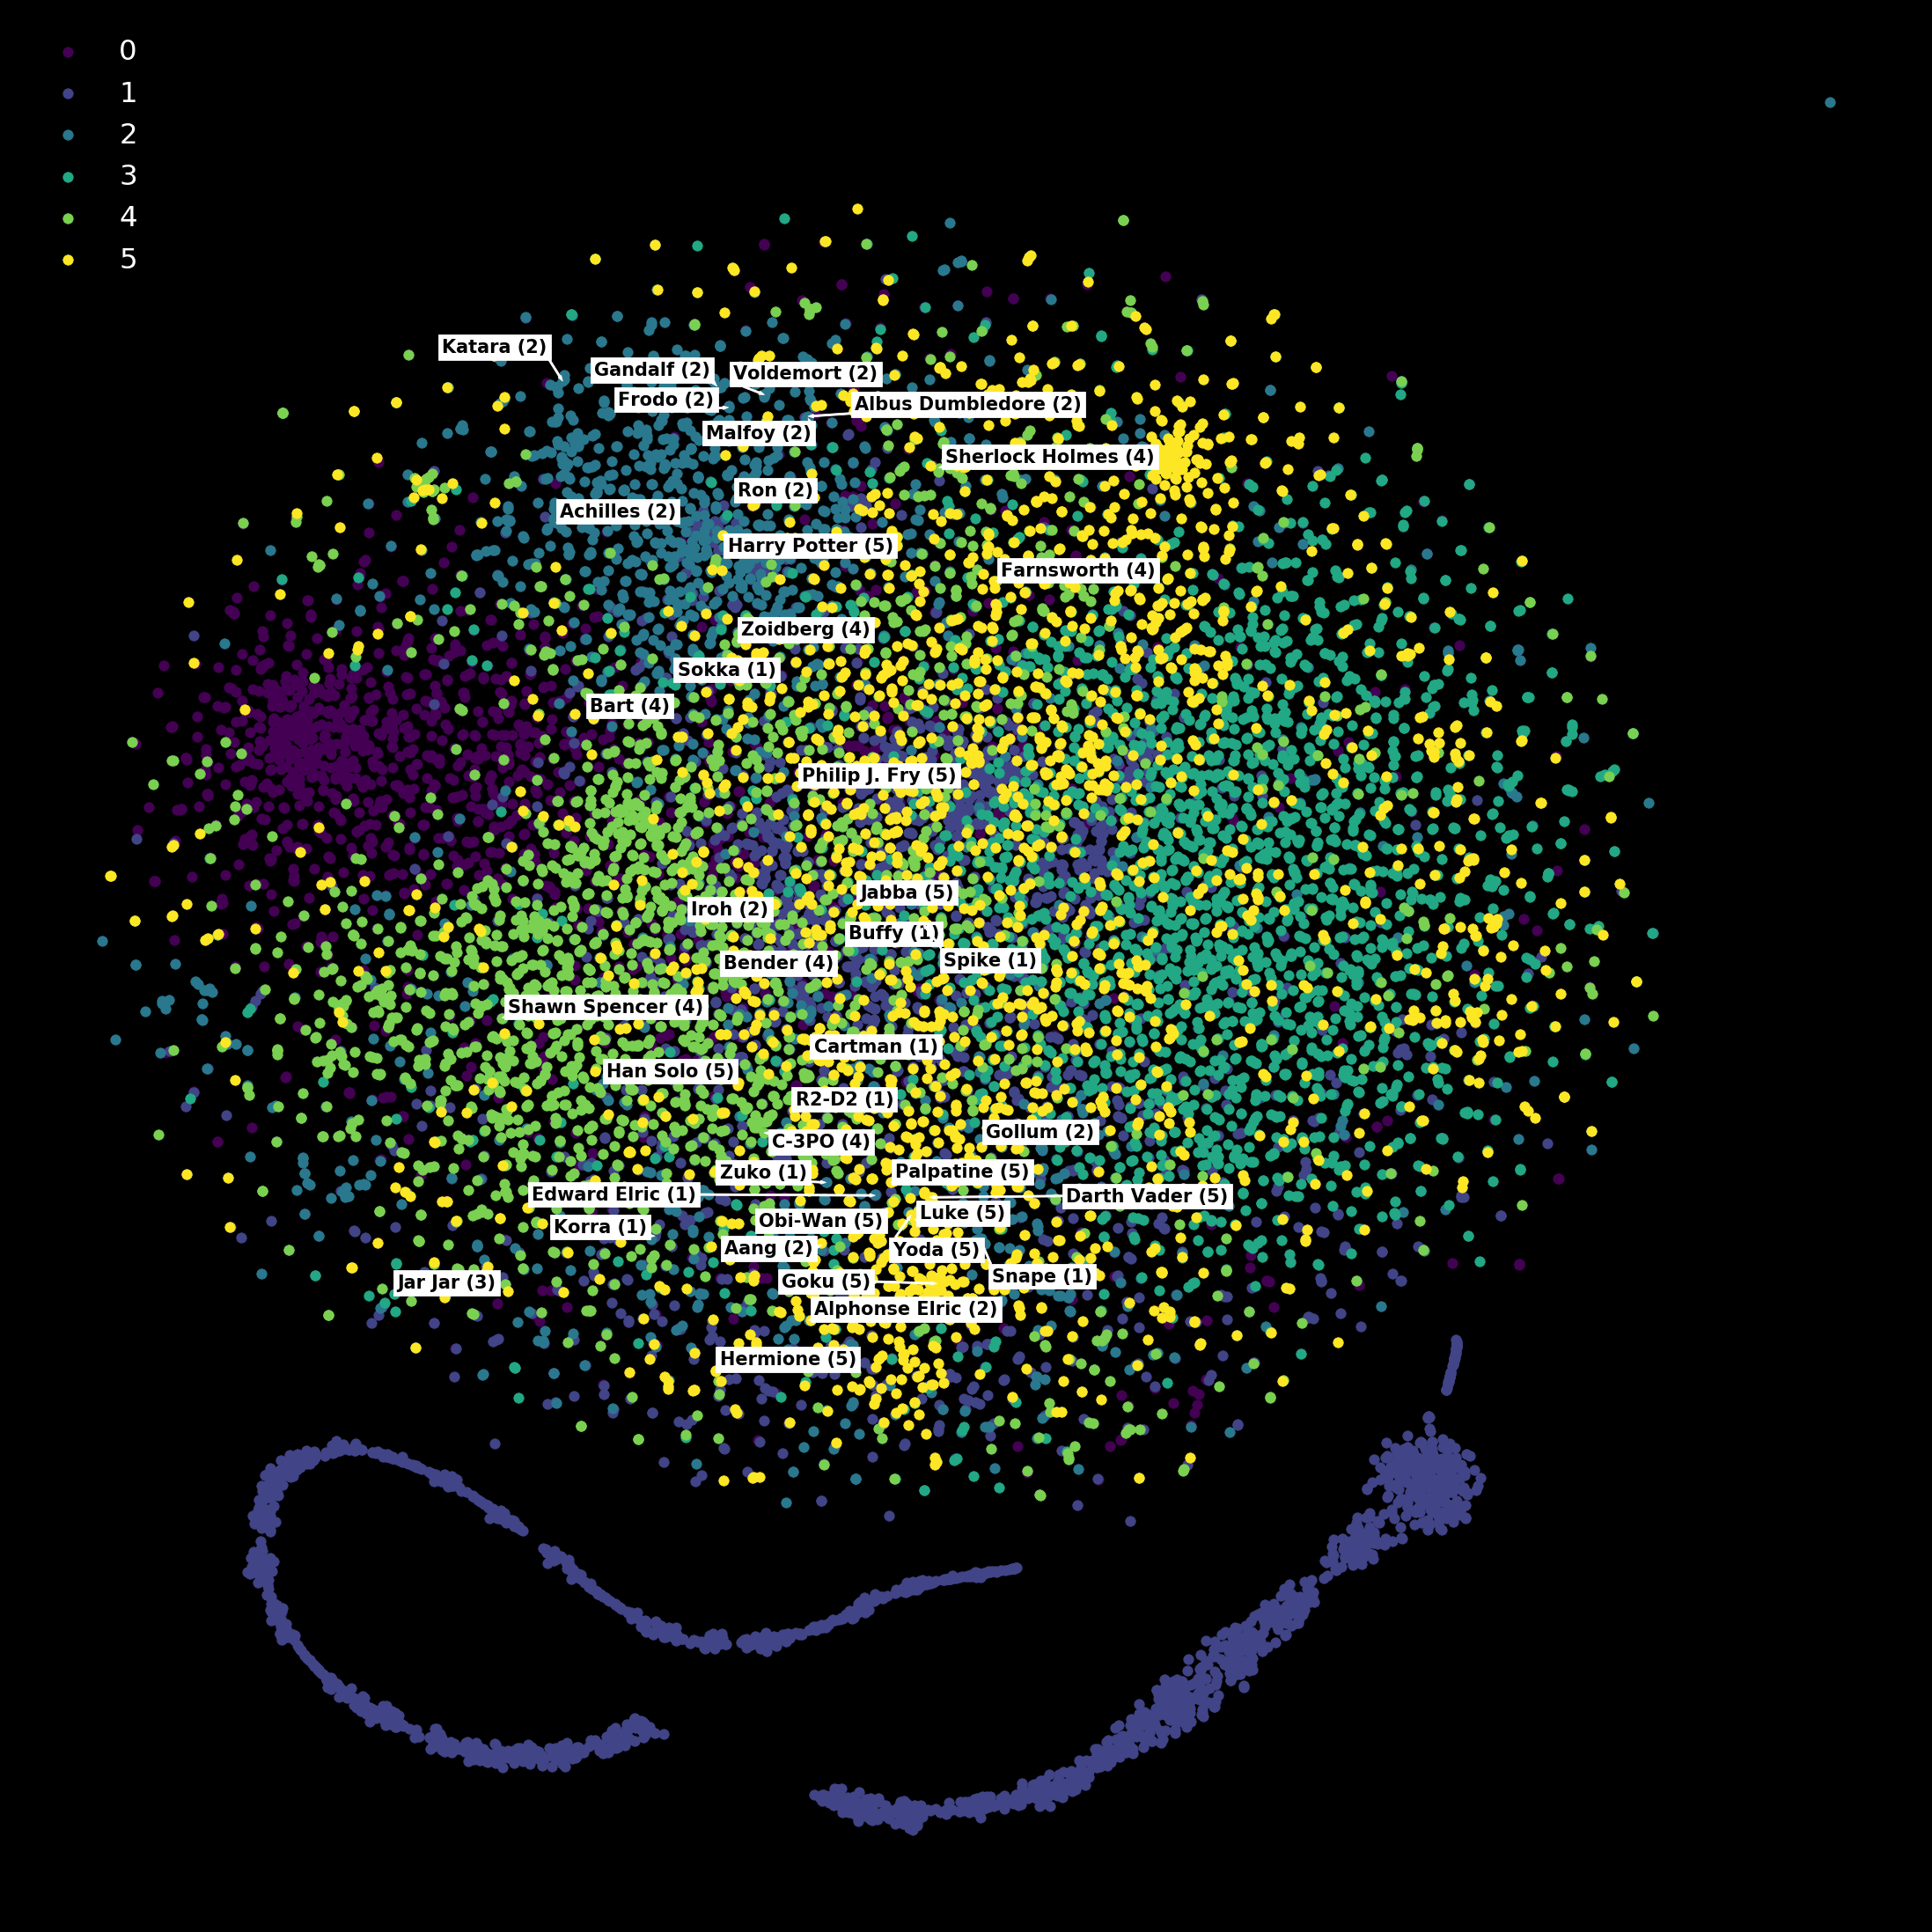

In [119]:
plt.rcParams['figure.dpi'] = 150
sns.set()
plt.style.use("dark_background")
sns.set_context("talk", font_scale=1.2,)

def plot_clustering(points_2d, cluster_labels, point_labels=None):
    tsne = TSNE(n_iter=250)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    cmap = matplotlib.cm.get_cmap('viridis')
    num_clusters = len(np.unique(cluster_labels))
    ax.set_prop_cycle(cycler('color', [cmap(i) for i in np.linspace(0, 1, num_clusters)]))

    for label in np.unique(cluster_labels):
        points = points_2d[cluster_labels == label]
        plt.scatter(points[:, 0], points[:, 1], label=label, s=30)
        
    plt.legend()
#     texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
#     adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    texts = []
    if point_labels is not None:
        for label, point_index in point_labels:
            point = points_2d[point_index]
            box_style = dict(fc='white', pad=5)
            arrow_style =dict(facecolor='white', shrink=0)
#             text = ax.annotate(
#                 label, 
#                 xy=point, 
#                 fontsize=10, 
#                 verticalalignment='bottom', 
#                 horizontalalignment='center', 
#                 color='black', 
#                 weight='bold', 
#                 bbox=box_style, 
#                 xytext=(0, 30), 
#                 textcoords='offset pixels',
#                 arrowprops=arrow_style
#             )
#             texts.append(text)
        for label, point_index in point_labels:
            cluster_label = cluster_labels[point_index]
            point = points_2d[point_index]
            box_style = dict(fc='white', pad=2, alpha=1)
            
#             label = label.split(' ')[0]
            label += f' ({cluster_label})'
#             arrow_style =dict(facecolor=('gray'), arrowstyle='-')
            text = plt.text(
                point[0],
                point[1],
                label, 
                fontsize=10, 
                verticalalignment='bottom', 
                horizontalalignment='center', 
                color='black', 
                weight='bold', 
                bbox=box_style
                
            )
            texts.append(text)
    arrow_style =dict(facecolor=('white'), width=1, headwidth=2, headlength=3)
    adjust_text(texts, arrowprops=arrow_style, lim=1000)
    plt.tight_layout()
    
plot_clustering(points_2d, cluster_labels, point_labels)

In [60]:
from gensim.models import doc2vec

In [62]:
ls

category_notes.md  images/                main.py     sandbox.py
documents/         logs/                  notebooks/  setup.py
hwmf/              long_run_on_raw.model  README.md


In [120]:
model = doc2vec.Doc2Vec.load('hwmf/data/first_that_doesnt_suck.model')

NameError: name 'doc2vec' is not defined